<a href="https://colab.research.google.com/github/nandir2512/DeepLearning/blob/main/CNN_From_Scratch_for_CIFAR_10_using_a_Sequential_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import numpy as np

import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, optimizers, utils, datasets
from keras.optimizers import SGD

# Paramerters

In [2]:
NUM_CLASSES = 10

# Data Extraction

In [3]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

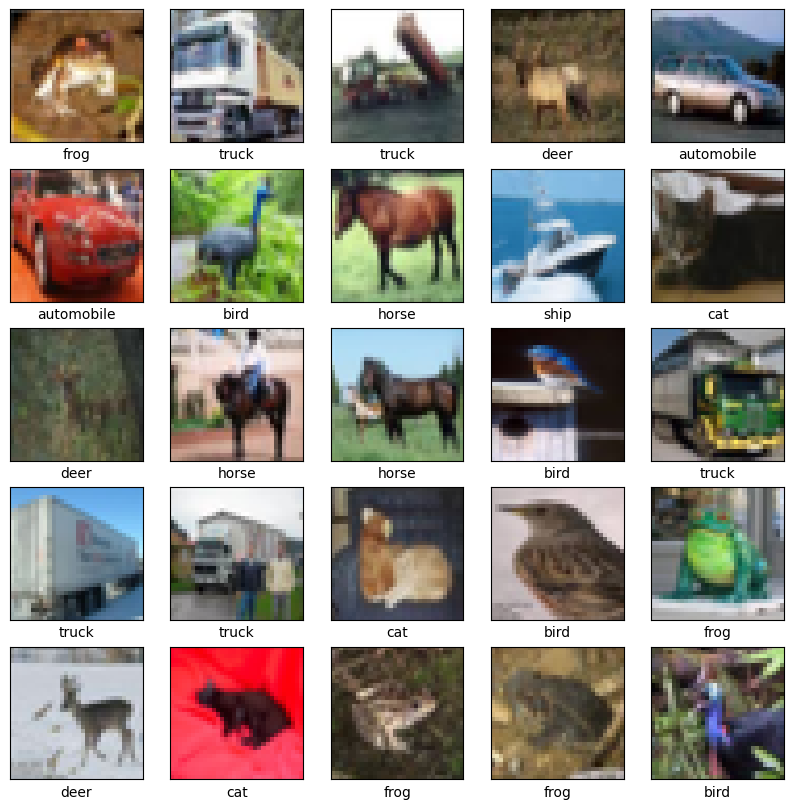

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [5]:
x_train = x_train.astype("float32") /255.0
x_test = x_test.astype("float32") / 255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

#plot diagnostic learning curves

In [6]:
# plot diagnostic learning curves
def plot(history):
	# plot loss
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='test')

	# plot accuracy
	plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='test')




# Model Building - VGG1

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(layers.Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

#Compile Model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

# Fit Model

In [9]:
history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/100
782/782 [==============================] - 12s 12ms/step - loss: 1.9809 - accuracy: 0.2883 - val_loss: 1.7623 - val_accuracy: 0.3861
Epoch 2/100
782/782 [==============================] - 5s 6ms/step - loss: 1.6718 - accuracy: 0.4114 - val_loss: 1.5569 - val_accuracy: 0.4516
Epoch 3/100
782/782 [==============================] - 4s 6ms/step - loss: 1.4745 - accuracy: 0.4769 - val_loss: 1.3846 - val_accuracy: 0.5062
Epoch 4/100
782/782 [==============================] - 4s 5ms/step - loss: 1.3409 - accuracy: 0.5246 - val_loss: 1.3234 - val_accuracy: 0.5323
Epoch 5/100
782/782 [==============================] - 4s 5ms/step - loss: 1.2539 - accuracy: 0.5591 - val_loss: 1.2480 - val_accuracy: 0.5544
Epoch 6/100
782/782 [==============================] - 4s 6ms/step - loss: 1.1857 - accuracy: 0.5838 - val_loss: 1.1983 - val_accuracy: 0.5738
Epoch 7/100
782/782 [==============================] - 4s 5ms/step - loss: 1.1194 - accuracy: 0.6068 - val_loss: 1.2118 - val_accuracy: 0.57

 # evaluate model

In [10]:
 _, acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 3.0167 - accuracy: 0.6582


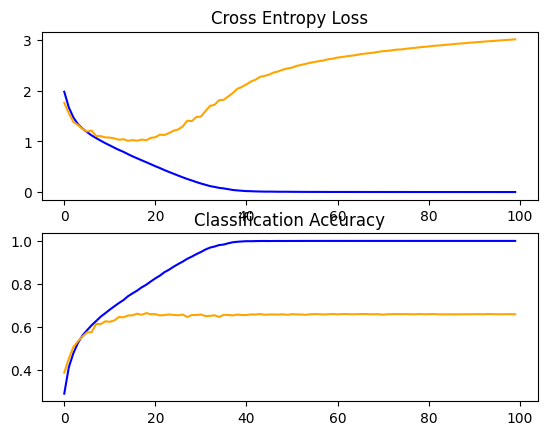

In [11]:
plot(history)

# Model Building - VGG2

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(layers.Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3), activation='relu', padding='same'))
model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

#Compile Model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

In [14]:
history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/100
782/782 [==============================] - 8s 9ms/step - loss: 2.0631 - accuracy: 0.2526 - val_loss: 1.8046 - val_accuracy: 0.3640
Epoch 2/100
782/782 [==============================] - 6s 8ms/step - loss: 1.6922 - accuracy: 0.4024 - val_loss: 1.5830 - val_accuracy: 0.4376
Epoch 3/100
782/782 [==============================] - 6s 8ms/step - loss: 1.4905 - accuracy: 0.4705 - val_loss: 1.4230 - val_accuracy: 0.4966
Epoch 4/100
782/782 [==============================] - 6s 7ms/step - loss: 1.3670 - accuracy: 0.5127 - val_loss: 1.3019 - val_accuracy: 0.5386
Epoch 5/100
782/782 [==============================] - 6s 8ms/step - loss: 1.2766 - accuracy: 0.5479 - val_loss: 1.2485 - val_accuracy: 0.5570
Epoch 6/100
782/782 [==============================] - 6s 7ms/step - loss: 1.1957 - accuracy: 0.5777 - val_loss: 1.2203 - val_accuracy: 0.5605
Epoch 7/100
782/782 [==============================] - 7s 9ms/step - loss: 1.1251 - accuracy: 0.6034 - val_loss: 1.1326 - val_accuracy: 0.5973

In [15]:
 # evaluate model
_, acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 3.7281 - accuracy: 0.6762


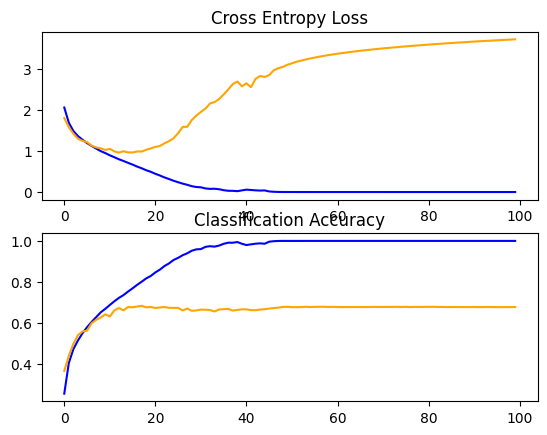

In [16]:
plot(history)

# Model Building - VGG3

In [17]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(layers.Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3), activation='relu', padding='same'))
model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3), activation='relu', padding='same'))
model.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

#Compile Model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

In [19]:
history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/100
782/782 [==============================] - 9s 9ms/step - loss: 2.1954 - accuracy: 0.1909 - val_loss: 1.9582 - val_accuracy: 0.2961
Epoch 2/100
782/782 [==============================] - 7s 9ms/step - loss: 1.8318 - accuracy: 0.3434 - val_loss: 1.7611 - val_accuracy: 0.3678
Epoch 3/100
782/782 [==============================] - 6s 8ms/step - loss: 1.5885 - accuracy: 0.4325 - val_loss: 1.5048 - val_accuracy: 0.4627
Epoch 4/100
782/782 [==============================] - 7s 8ms/step - loss: 1.4530 - accuracy: 0.4813 - val_loss: 1.4714 - val_accuracy: 0.4721
Epoch 5/100
782/782 [==============================] - 6s 8ms/step - loss: 1.3598 - accuracy: 0.5145 - val_loss: 1.3407 - val_accuracy: 0.5178
Epoch 6/100
782/782 [==============================] - 6s 8ms/step - loss: 1.2778 - accuracy: 0.5445 - val_loss: 1.2473 - val_accuracy: 0.5545
Epoch 7/100
782/782 [==============================] - 6s 8ms/step - loss: 1.1968 - accuracy: 0.5770 - val_loss: 1.2225 - val_accuracy: 0.5651

In [20]:
 # evaluate model
_, acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 3.4141 - accuracy: 0.7076


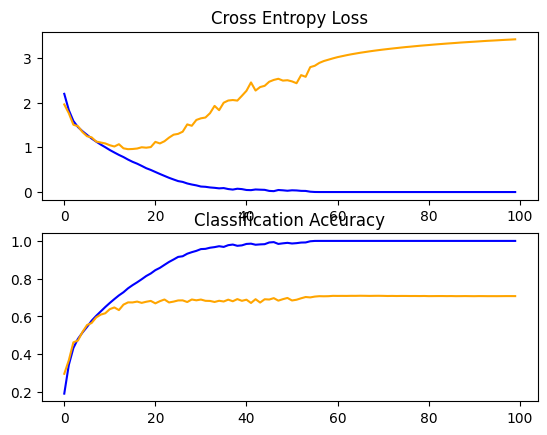

In [21]:
plot(history)

* VGG 1: 65.82 % with 100 epochs
* VGG 2: 67.62% with 100 epochs
* VGG 3: 70.76% with 100 epochs

# Model Building- VGG3 with Added Dropout Regularization

Dropout is a simple technique that will randomly drop nodes out of the network. It has a regularizing effect as the remaining nodes must adapt to pick-up the slack of the removed nodes.

For more on dropout, see the post:

A Gentle Introduction to Dropout for Regularizing Deep Neural Networks
Dropout can be added to the model by adding new Dropout layers, where the amount of nodes removed is specified as a parameter. There are many patterns for adding Dropout to a model, in terms of where in the model to add the layers and how much dropout to use.

In this case, we will add Dropout layers after each max pooling layer and after the fully connected layer, and use a fixed dropout rate of 20% (e.g. retain 80% of the nodes).

In [39]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(layers.Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64,(3,3), activation='relu', padding='same'))
model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(128,(3,3), activation='relu', padding='same'))
model.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

#Compile Model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_31 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_32 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_33 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

In [41]:
history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/100
782/782 [==============================] - 9s 11ms/step - loss: 2.2221 - accuracy: 0.1610 - val_loss: 1.9951 - val_accuracy: 0.2748
Epoch 2/100
782/782 [==============================] - 8s 10ms/step - loss: 1.9710 - accuracy: 0.2780 - val_loss: 1.8512 - val_accuracy: 0.3344
Epoch 3/100
782/782 [==============================] - 7s 9ms/step - loss: 1.8254 - accuracy: 0.3349 - val_loss: 1.7709 - val_accuracy: 0.3750
Epoch 4/100
782/782 [==============================] - 8s 10ms/step - loss: 1.6930 - accuracy: 0.3827 - val_loss: 1.5699 - val_accuracy: 0.4359
Epoch 5/100
782/782 [==============================] - 8s 10ms/step - loss: 1.5942 - accuracy: 0.4216 - val_loss: 1.4533 - val_accuracy: 0.4775
Epoch 6/100
782/782 [==============================] - 7s 9ms/step - loss: 1.5014 - accuracy: 0.4562 - val_loss: 1.3953 - val_accuracy: 0.5003
Epoch 7/100
782/782 [==============================] - 8s 10ms/step - loss: 1.4218 - accuracy: 0.4864 - val_loss: 1.3086 - val_accuracy: 0

In [42]:
 # evaluate model
_, acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6350 - accuracy: 0.8173


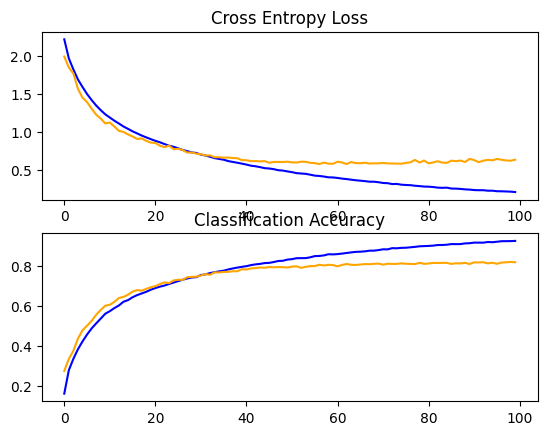

In [43]:
plot(history)

#Model Building - VGG3 with Weight Decay

Use Weight Regularization to Reduce Overfitting of Deep Learning Models

Weight regularization or weight decay involves updating the loss function to penalize the model in proportion to the size of the model weights.

This has a regularizing effect, as larger weights result in a more complex and less stable model, whereas smaller weights are often more stable and more general.

In [44]:
from keras.regularizers import l2

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001), input_shape=(32,32,3)))
model.add(layers.Conv2D(32, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(layers.Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(layers.Dense(10, activation='softmax'))

#Compile Model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_37 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_39 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                 

In [46]:
history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/100
782/782 [==============================] - 8s 9ms/step - loss: 2.8530 - accuracy: 0.1796 - val_loss: 2.6323 - val_accuracy: 0.2566
Epoch 2/100
782/782 [==============================] - 6s 8ms/step - loss: 2.4736 - accuracy: 0.3166 - val_loss: 2.2946 - val_accuracy: 0.3944
Epoch 3/100
782/782 [==============================] - 7s 8ms/step - loss: 2.2176 - accuracy: 0.4133 - val_loss: 2.0795 - val_accuracy: 0.4566
Epoch 4/100
782/782 [==============================] - 6s 8ms/step - loss: 2.0595 - accuracy: 0.4620 - val_loss: 1.9928 - val_accuracy: 0.4874
Epoch 5/100
782/782 [==============================] - 7s 8ms/step - loss: 1.9492 - accuracy: 0.5009 - val_loss: 1.9161 - val_accuracy: 0.5158
Epoch 6/100
782/782 [==============================] - 6s 8ms/step - loss: 1.8643 - accuracy: 0.5261 - val_loss: 1.8633 - val_accuracy: 0.5230
Epoch 7/100
782/782 [==============================] - 7s 9ms/step - loss: 1.7916 - accuracy: 0.5463 - val_loss: 1.7753 - val_accuracy: 0.5534

In [47]:
 # evaluate model
_, acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 2.0201 - accuracy: 0.6706


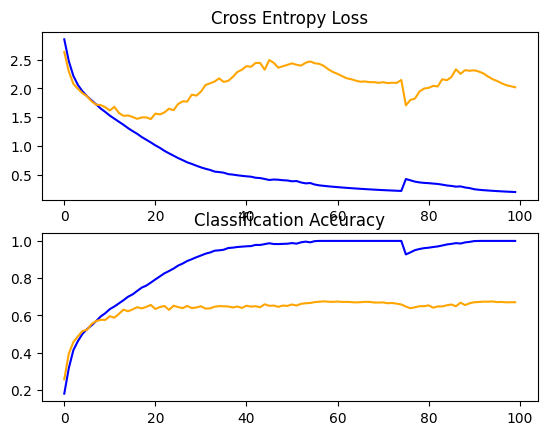

In [48]:
plot(history)

# Model Building - VGG3 with Data Augmentation

Data augmentation involves making copies of the examples in the training dataset with small random modifications.

This has a regularizing effect as it both expands the training dataset and allows the model to learn the same general features, although in a more generalized manner.

There are many types of data augmentation that could be applied. Given that the dataset is comprised of small photos of objects, we do not want to use augmentation that distorts the images too much, so that useful features in the images can be preserved and used.

The types of random augmentations that could be useful include a horizontal flip, minor shifts of the image, and perhaps small zooming or cropping of the image.

We will investigate the effect of simple augmentation on the baseline image, specifically horizontal flips and 10% shifts in the height and width of the image.



In [49]:
from keras.preprocessing.image import ImageDataGenerator

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(layers.Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3), activation='relu', padding='same'))
model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3), activation='relu', padding='same'))
model.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

#Compile Model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# CreateData Generator

In [50]:
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)


# Prepare iterator

In [51]:
it_train = datagen.flow(x_train, y_train, batch_size=64)

# Fit Model

In [52]:
steps = int(x_train.shape[0]/ 64)
history = model.fit_generator(it_train, steps_per_epoch= steps, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100


<ipython-input-52-1a12ef46c581>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(it_train, steps_per_epoch= steps, epochs=100, validation_data=(x_test, y_test))


781/781 [==============================] - 30s 37ms/step - loss: 2.1276 - accuracy: 0.2082 - val_loss: 1.8944 - val_accuracy: 0.3185
Epoch 2/100
781/781 [==============================] - 29s 37ms/step - loss: 1.8269 - accuracy: 0.3402 - val_loss: 1.6869 - val_accuracy: 0.3963
Epoch 3/100
781/781 [==============================] - 29s 37ms/step - loss: 1.6291 - accuracy: 0.4110 - val_loss: 1.5000 - val_accuracy: 0.4575
Epoch 4/100
781/781 [==============================] - 29s 38ms/step - loss: 1.5199 - accuracy: 0.4549 - val_loss: 1.4035 - val_accuracy: 0.5026
Epoch 5/100
781/781 [==============================] - 28s 36ms/step - loss: 1.4453 - accuracy: 0.4817 - val_loss: 1.3455 - val_accuracy: 0.5209
Epoch 6/100
781/781 [==============================] - 29s 37ms/step - loss: 1.3870 - accuracy: 0.5039 - val_loss: 1.2660 - val_accuracy: 0.5496
Epoch 7/100
781/781 [==============================] - 29s 38ms/step - loss: 1.3270 - accuracy: 0.5239 - val_loss: 1.2807 - val_accuracy: 0.54

In [53]:
 # evaluate model
_, acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.6366 - accuracy: 0.8270


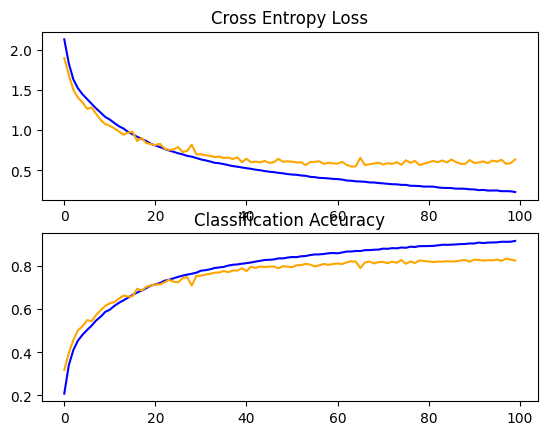

In [54]:
plot(history)

* VGG3 with Added Dropout Regularization - 81.73%
* VGG3 with Weight Decay - 67.06%
* VGG3 with Data Augmentation - 83.57% with 98 epochs, 82.70% with 100 epochs

In [57]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis= -1)]
actual_single = CLASSES[np.argmax(y_test, axis= -1)]



313/313 [==============================] - 1s 2ms/step


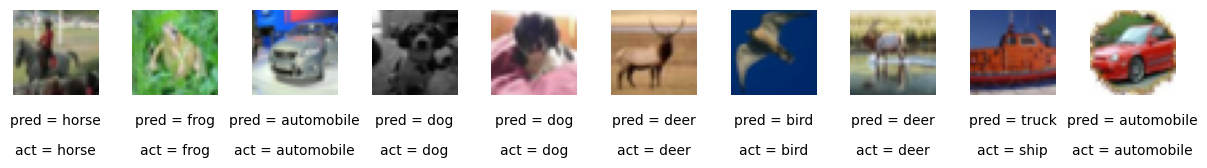

In [58]:
n_to_show =10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
  img = x_test[idx]
  ax= fig.add_subplot(1, n_to_show, i+1)
  ax.axis('off')
  ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10
          , ha='center', transform=ax.transAxes)
  ax.text(0.5, -0.7, 'act = ' +str(actual_single[idx]), fontsize=10,
          ha='center', transform=ax.transAxes)
  ax.imshow(img)